<a href="https://colab.research.google.com/github/Sarthakpunj/gemini_intro/blob/main/gemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install -q -U google-generativeai

In [26]:
import google.generativeai as genai
import pathlib
import textwrap
from IPython.display import display
from IPython.display import Markdown

In [29]:
#import api key
from google.colab import userdata
api= userdata.get('gemini')
#configuring
genai.configure(api_key=api)

In [32]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-2.5-pro-exp-03-25
models/gemini-2.5-pro-preview-03-25
models/gemini-2.5-flash-preview-04-17
models/gemini-2.5-flash-preview-04-17-thinking
models/gemini-2.5-pro-preview-05-06
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-preview-image-generation
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-2.0-pro

In [42]:
#text generation
model = genai.GenerativeModel('gemini-2.0-flash')
response = model.generate_content("what is meaning of life?")
print(response.text) #all the output

Ah, the big question! The meaning of life is something that has puzzled philosophers, theologians, and individuals for centuries. There's no single, universally accepted answer, and that's kind of the beauty of it.

Here's a breakdown of different perspectives on the meaning of life:

**1. Philosophical Perspectives:**

*   **Nihilism:** Argues that life is inherently without objective meaning, purpose, or intrinsic value.
*   **Existentialism:** Emphasizes individual freedom and responsibility.  We create our own meaning through our choices and actions.  Key figures: Jean-Paul Sartre, Albert Camus. The famous phrase "existence precedes essence" means we are born into the world without a predetermined purpose, and we define our essence through our choices.
*   **Absurdism:**  Accepts the inherent conflict between humanity's search for meaning and the meaningless nature of the universe.  We should embrace this absurdity and live with passion despite it.  Camus wrote extensively on this.

In [43]:
response.candidates #best output

[content {
  parts {
    text: "Ah, the big question! The meaning of life is something that has puzzled philosophers, theologians, and individuals for centuries. There\'s no single, universally accepted answer, and that\'s kind of the beauty of it.\n\nHere\'s a breakdown of different perspectives on the meaning of life:\n\n**1. Philosophical Perspectives:**\n\n*   **Nihilism:** Argues that life is inherently without objective meaning, purpose, or intrinsic value.\n*   **Existentialism:** Emphasizes individual freedom and responsibility.  We create our own meaning through our choices and actions.  Key figures: Jean-Paul Sartre, Albert Camus. The famous phrase \"existence precedes essence\" means we are born into the world without a predetermined purpose, and we define our essence through our choices.\n*   **Absurdism:**  Accepts the inherent conflict between humanity\'s search for meaning and the meaningless nature of the universe.  We should embrace this absurdity and live with passion

In [44]:
#genreate output in steram like output keeps on coming like chatgpt
#model.generate_content(...): Asks the model the question "what is life?".

#stream=True: Enables streaming, so the response is given in parts (chunks), not all at once.

#for i in response:: Loops over each part of the streamed response.

#print(i.text): Prints the text of each chunk.

#print("_" * 80): Prints a line of 80 underscores as a separator after each chunk.

response = model.generate_content("what is life?",stream=True)
for i in response:
  print(i.text)
  print("_"*80)

Ah
________________________________________________________________________________
, the age-old question! Defining life is surprisingly tricky, and there's no single
________________________________________________________________________________
, universally agreed-upon answer. However, we can identify a set of characteristics that
________________________________________________________________________________
, taken together, generally distinguish living things from non-living matter. Here's a breakdown:

**Common Characteristics of Life:**

*   **Organization
________________________________________________________________________________
:** Living things exhibit a high degree of order and complexity. They are made up of cells, which are the basic units of life. These cells are organized into
________________________________________________________________________________
 tissues, organs, and systems.

*   **Metabolism:** This is the sum of all chemical processes that occur w

In [45]:
#generate text from image

!curl -o image.jpg https://wallpaperaccess.com/full/767054.jpg #loading image from google to memory

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  535k  100  535k    0     0   687k      0 --:--:-- --:--:-- --:--:--  688k


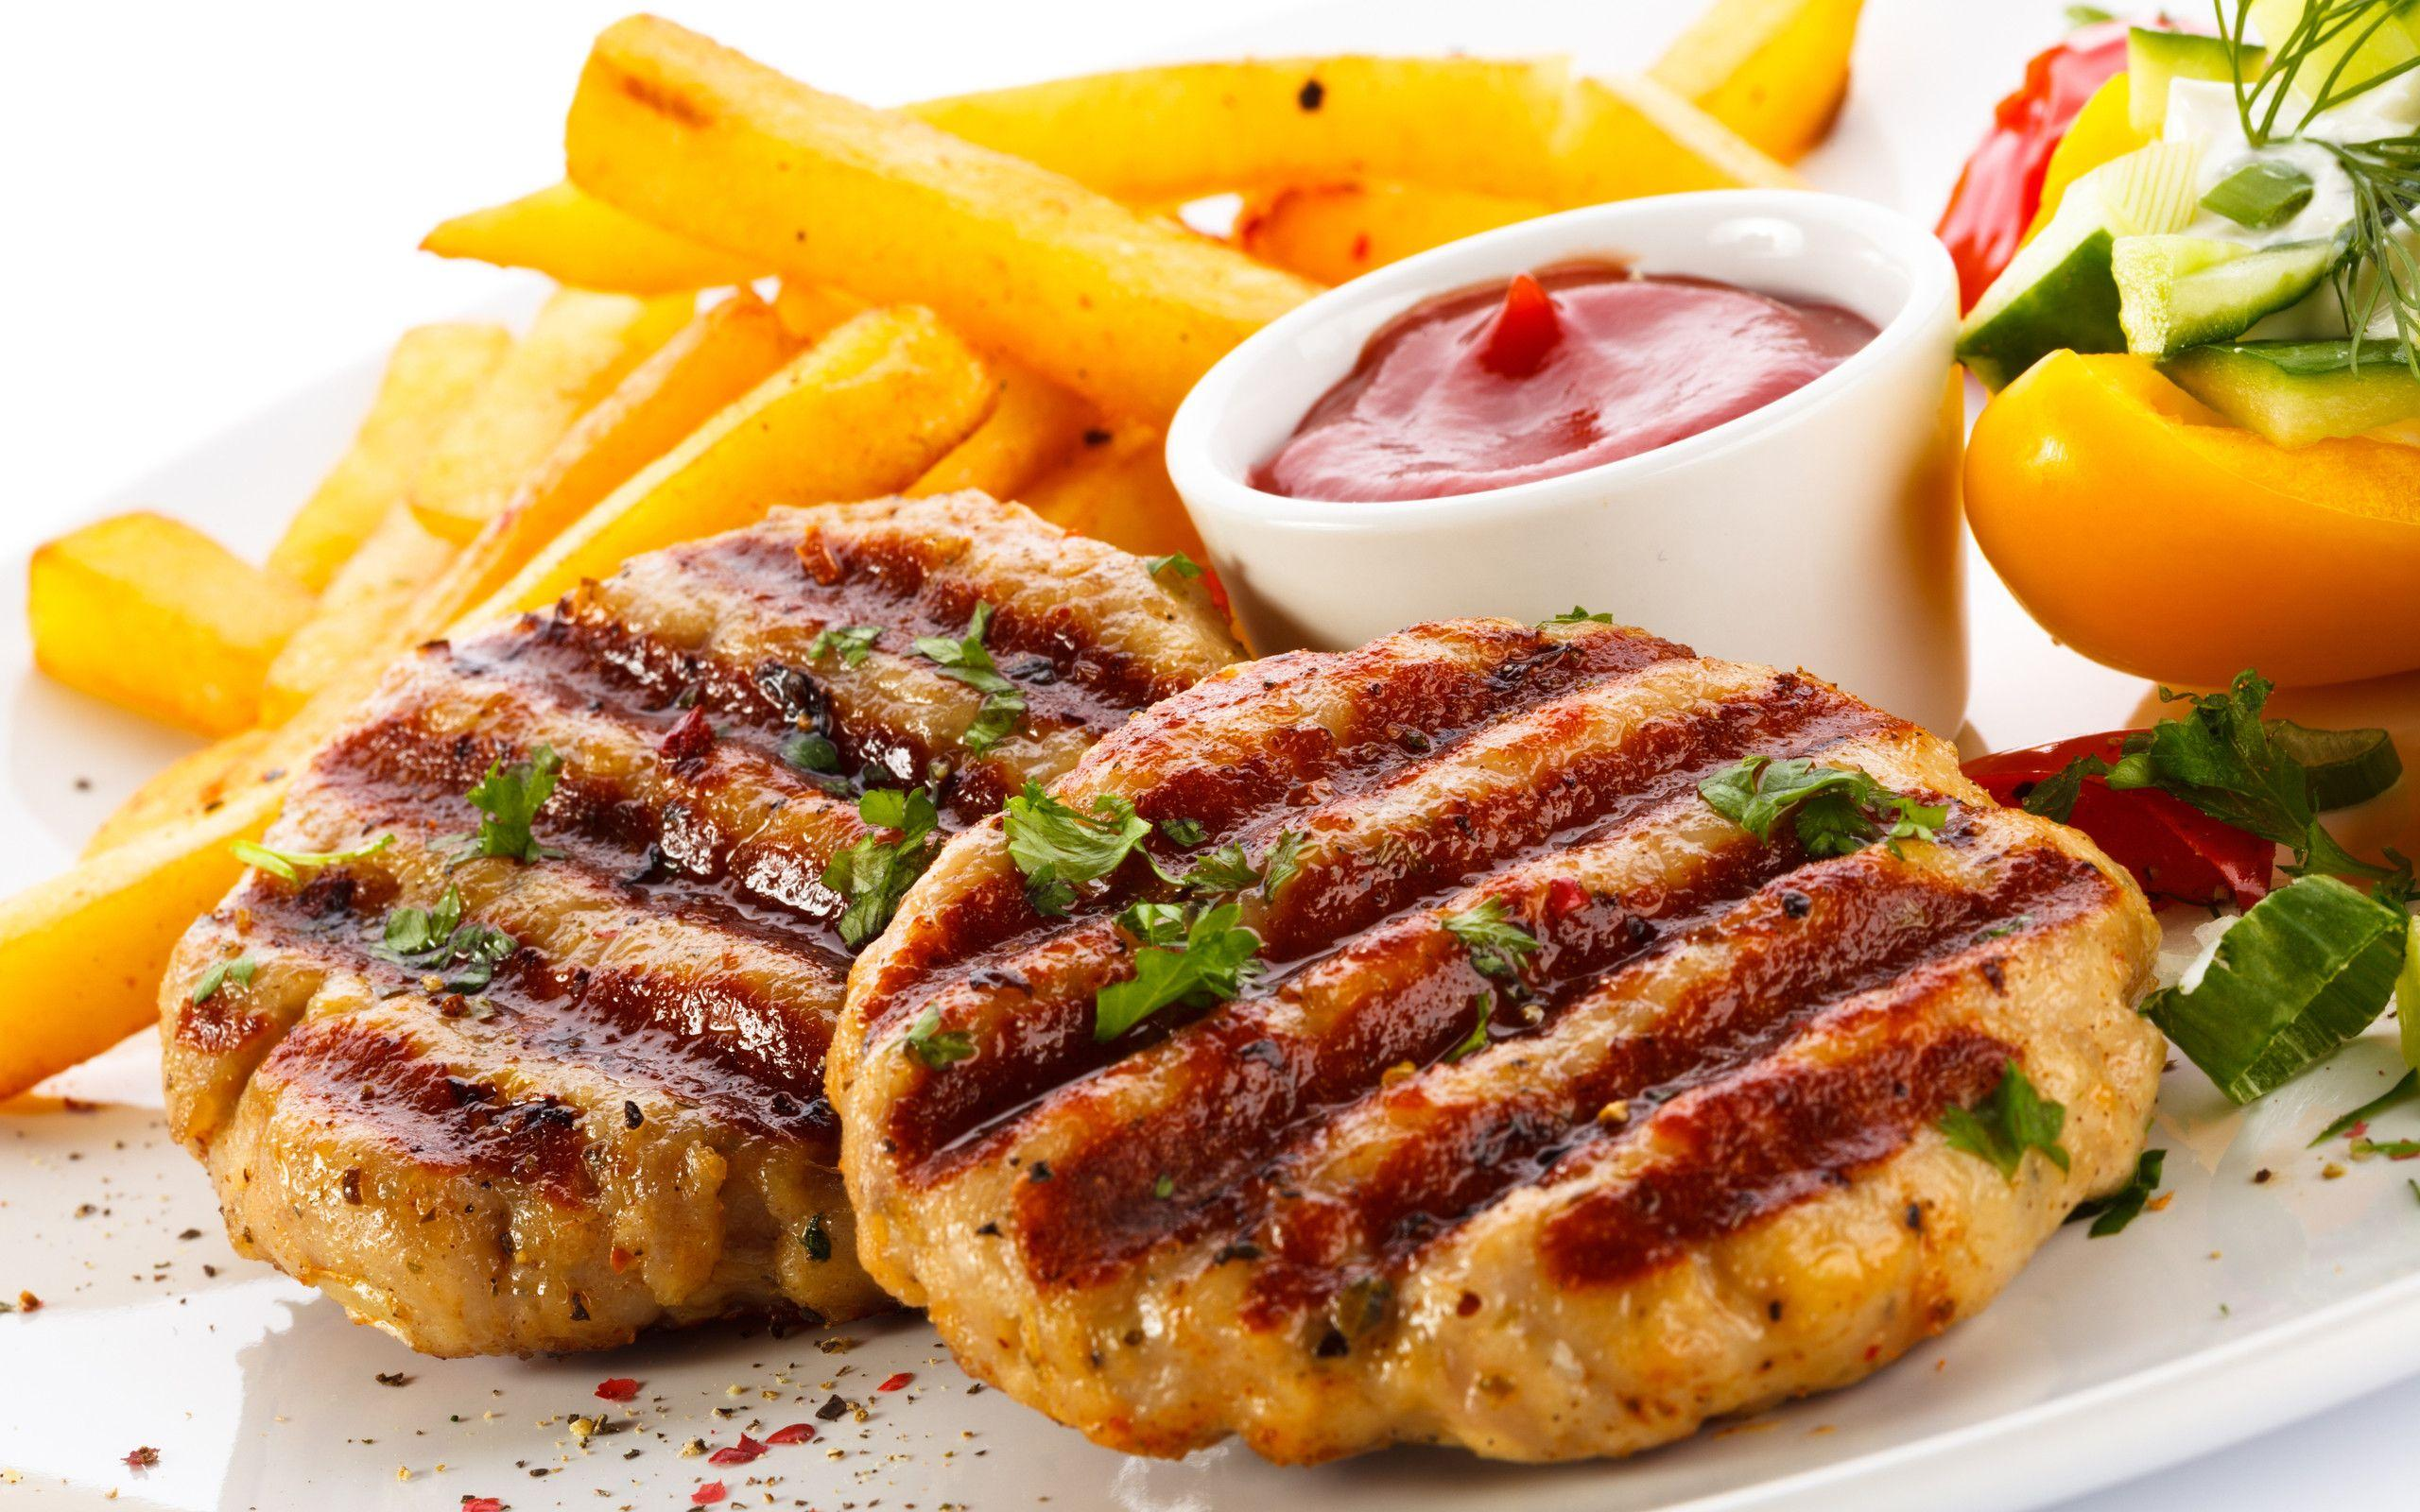

In [46]:
import PIL.Image
img = PIL.Image.open('image.jpg')
img

In [52]:
model2 = genai.GenerativeModel('gemini-1.5-flash')
response = model2.generate_content(img)
response.text

"Here's a description of the image:\n\nClose-up view of a plate of grilled patties, french fries, and a side salad.\xa0\n\n\nHere's a breakdown of the components:\n\n* **Grilled Patties:** Two well-grilled patties are prominently featured in the foreground. They have visible grill marks and appear juicy and flavorful.\xa0They are seasoned and possibly basted with a sauce.\n\n* **French Fries:** A pile of golden-brown french fries is visible behind and to the side of the patties. They look crispy.\n\n* **Side Salad:** A small portion of a fresh salad is visible at the upper right, consisting of diced vegetables (possibly bell peppers, cucumbers, and onions) and herbs. There's a creamy dressing on the salad.\n\n* **Ketchup:** A small white ramekin filled with ketchup sits nestled between the patties and the fries.\n\n* **Plate:** The food is served on a white plate that is reflective and shows a little bit of spilled seasoning.\n\nThe overall impression is one of a hearty, delicious, and

In [56]:
response = model2.generate_content(["write a short summary of what you see in this image?", img])
response.text

"Here's a short summary of the image:\n\nThe photo shows a plate of grilled hamburger patties served with french fries, a small bowl of ketchup, and a side salad including bell peppers, cucumber, and dill.  The patties appear juicy and well-seasoned. The overall impression is of a hearty and appetizing meal.\n"

In [58]:
# to clean ai response


# to clean ai response


def to_markdown(text):
  text.replace('.','*')
  return Markdown(textwrap.indent(text,'>',predicate=lambda x:True))

In [59]:
response = model2.generate_content(["write a short summary of what you see in this image?", img])
to_markdown(response.text)

>Here's a short summary of the image:
>
>The photo shows a delicious-looking plate of food.  It features two grilled hamburger patties, a generous portion of french fries, a small bowl of ketchup, and a side salad with bell peppers, cucumber, and herbs.  The overall impression is of a hearty and satisfying meal.
